In [17]:
import os
import sys
import csv
import logging
import matplotlib.pyplot as plt

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..',))
sys.path.append(repo_root)

from src import *

In [18]:
def evaluate_models(N, M, K1, K2, compared_axis, leadership=False, repetitions=20):
    columns = ['game', 'std', 'stdl', 'ho', 'hol', 'spring_rank', 'spring_rank_l', 'page_rank', 'page_rank_l', 'point']
    prop_keys = [f'prop_{columns[i]}_>{columns[compared_axis]}' for i in range(1, 10) if i != compared_axis]
    mean_keys = [f'mean_{columns[i]}' for i in range(1, 10)]
    
    proportions = {key: [] for key in ['train_size'] + prop_keys + mean_keys}

    train_sizes = np.logspace(-2, 0, endpoint=False, num=25)

    prop_accumulators = {key: np.zeros(len(train_sizes)) for key in prop_keys}
    mean_accumulators = {key: np.zeros(len(train_sizes)) for key in mean_keys}

    for rep in range(repetitions):
        if leadership:
            pi_values, data = generate_leadership_model_instance(N, M, K1, K2)
        else:
            pi_values, data = generate_model_instance(N, M, K1, K2)

        random.shuffle(data)

        for idx, train_size in enumerate(train_sizes):
            training_set, testing_set = split_games(data, train_size)

            df = run_models(training_set, testing_set, pi_values)
            
            prop_results = calculate_percentages(df, compared_axis)
            mean_results = calculate_column_means(df)

            for i, key in enumerate(prop_keys):
                prop_accumulators[key][idx] += prop_results[i]
            for i, key in enumerate(mean_keys):
                mean_accumulators[key][idx] += mean_results[i]

    for key in prop_keys:
        proportions[key] = (prop_accumulators[key] / repetitions).tolist()
    for key in mean_keys:
        proportions[key] = (mean_accumulators[key] / repetitions).tolist()
    proportions['train_size'] = train_sizes.tolist()
    
    return proportions

In [19]:
# def evaluate_models(N, M, K1, K2, compared_axis, leadership = False):
#     if leadership:
#         pi_values, data = generate_leadership_model_instance(N, M, K1, K2)
#     else:
#         pi_values, data = generate_model_instance(N, M, K1, K2)

#     random.shuffle(data)

#     columns = ['game', 'std', 'stdl', 'ho', 'hol', 'spring_rank', 'spring_rank_l','page_rank', 'page_rank_l', 'point',]
#     prop_keys = [f'prop_{columns[i]}_>{columns[compared_axis]}' for i in range(1,10) if i != compared_axis]
#     mean_keys = [f'mean_{columns[i]}' for i in range(1,10)]
    
#     proportions = {key: [] for key in ['train_size'] + prop_keys + mean_keys}

#     for train_size in np.logspace(-2, 0, endpoint=False, num=25):
#         training_set, testing_set = split_games(data, train_size)

#         df = run_models(training_set, testing_set, pi_values)
    
#         prop_results = calculate_percentages(df, compared_axis)
#         mean_results = calculate_column_means(df)

#         proportions['train_size'].append(train_size)
#         for i, key in enumerate(prop_keys):
#             proportions[key].append(prop_results[i])
#         for i, key in enumerate(mean_keys):
#             proportions[key].append(mean_results[i])
    
#     return proportions

def plot_proportions(proportions):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    train_size = proportions['train_size']
    
    # Plot proportions
    ax = axes[0]
    for key in proportions:
        if key != 'train_size' and 'prop_' in key:
            ax.plot(train_size, proportions[key], label=key, marker='o')
    ax.set_xscale('log')
    ax.set_xlabel('Train Size')
    ax.set_ylabel('Proportion')
    ax.set_title('Model Proportions vs Train Size')
    ax.legend()
    
    # Plot means
    ax = axes[1]
    for key in proportions:
        if key != 'train_size' and 'mean_' in key:
            ax.plot(train_size, proportions[key], label=key, marker='s')
    ax.set_xscale('log')
    ax.set_xlabel('Train Size')
    ax.set_ylabel('Mean')
    ax.set_title('Model Means vs Train Size')
    ax.legend()
    
    plt.tight_layout()
    plt.show()



# Standard 

In [20]:
N, M, K1, K2 = 1000, 2000, 2, 2
compared_axis = 1  
proportions = evaluate_models(N, M, K1, K2, compared_axis)

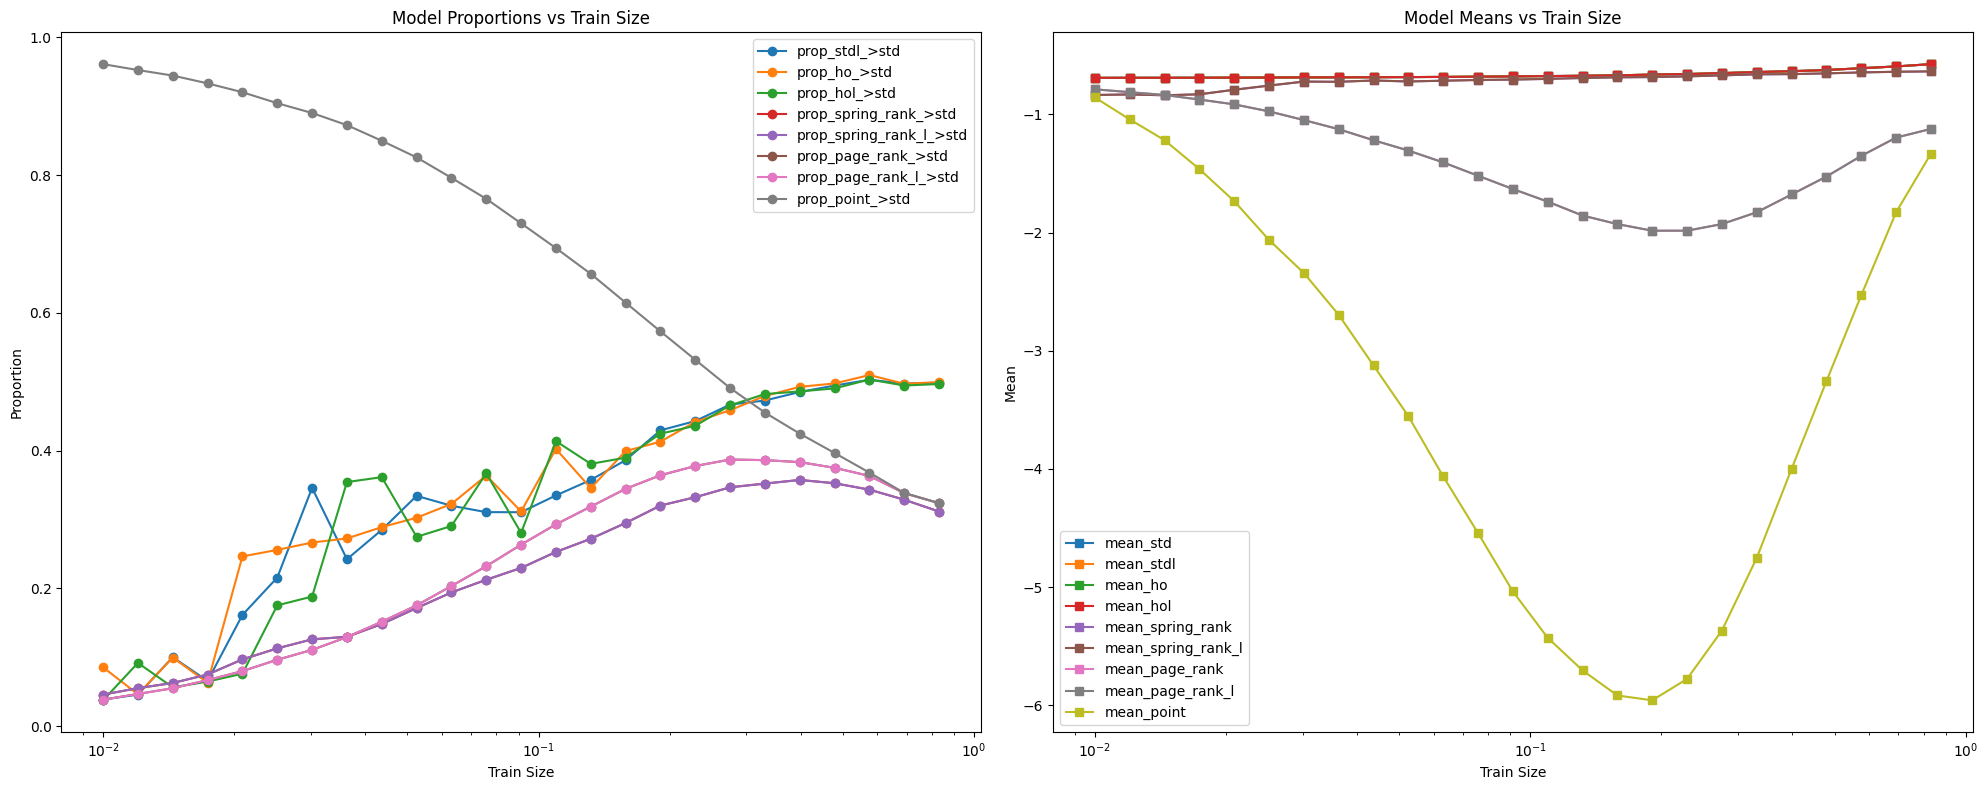

In [21]:
plot_proportions(proportions)

# Standard Leadership 

In [22]:
N, M, K1, K2 = 1000, 2000, 2, 2
compared_axis = 2
proportions = evaluate_models(N, M, K1, K2, compared_axis, leadership=True)

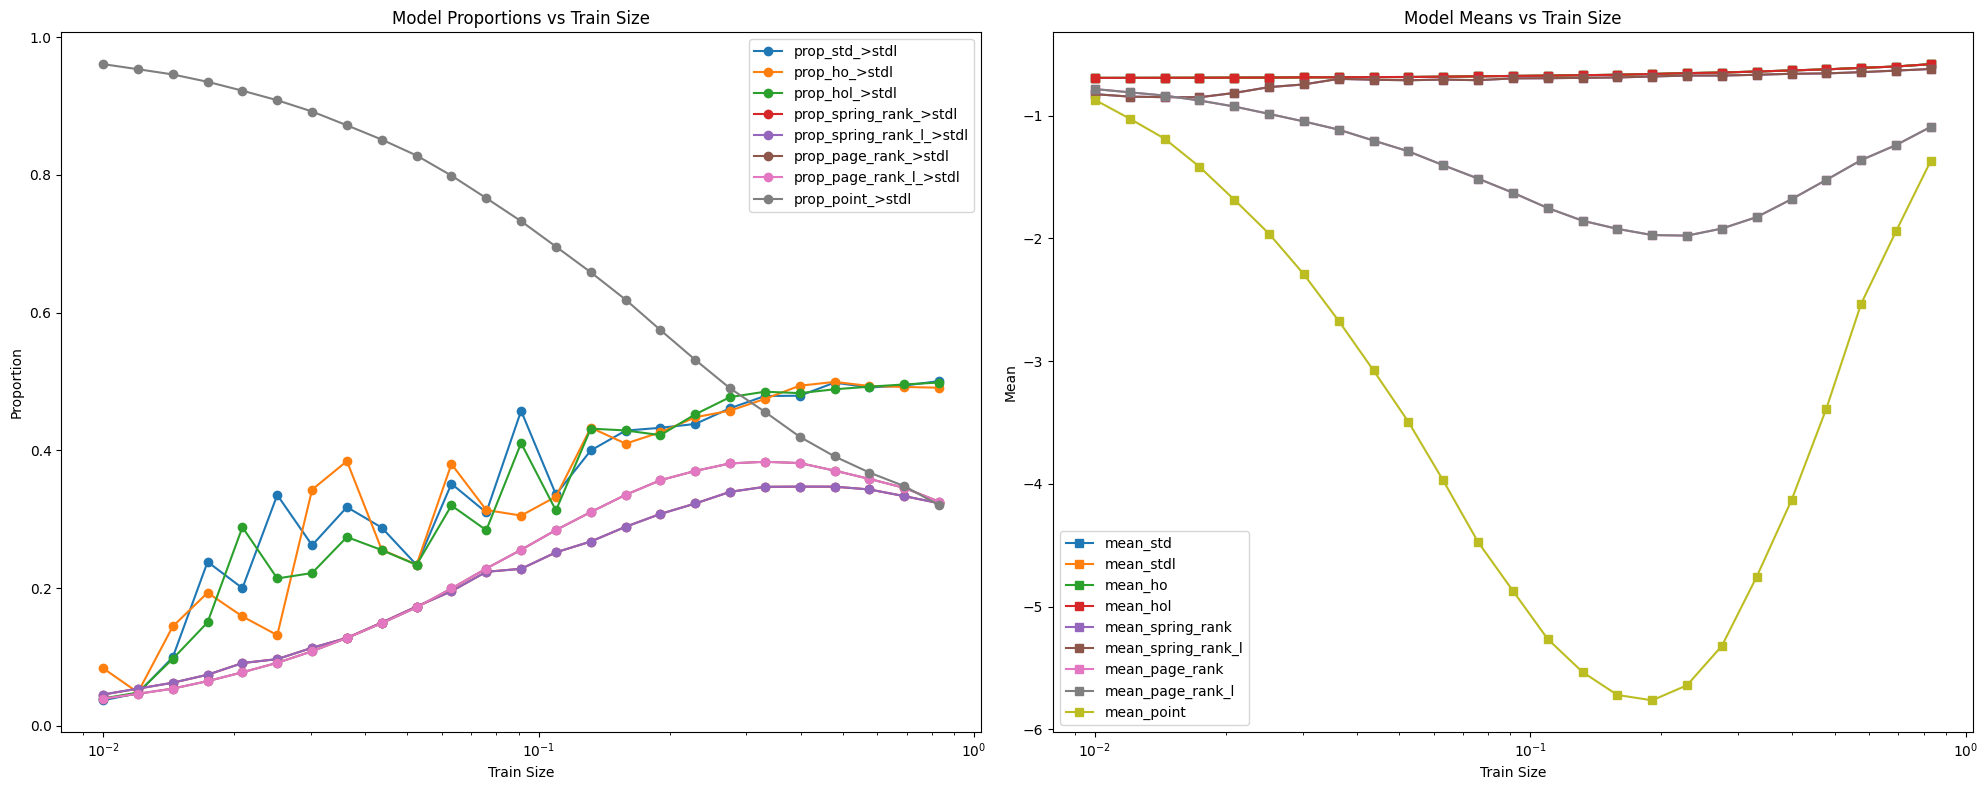

In [23]:
plot_proportions(proportions)

# Higher Order 

In [24]:
N, M, K1, K2 = 1000, 2000, 5, 5
compared_axis = 3
proportions = evaluate_models(N, M, K1, K2, compared_axis)


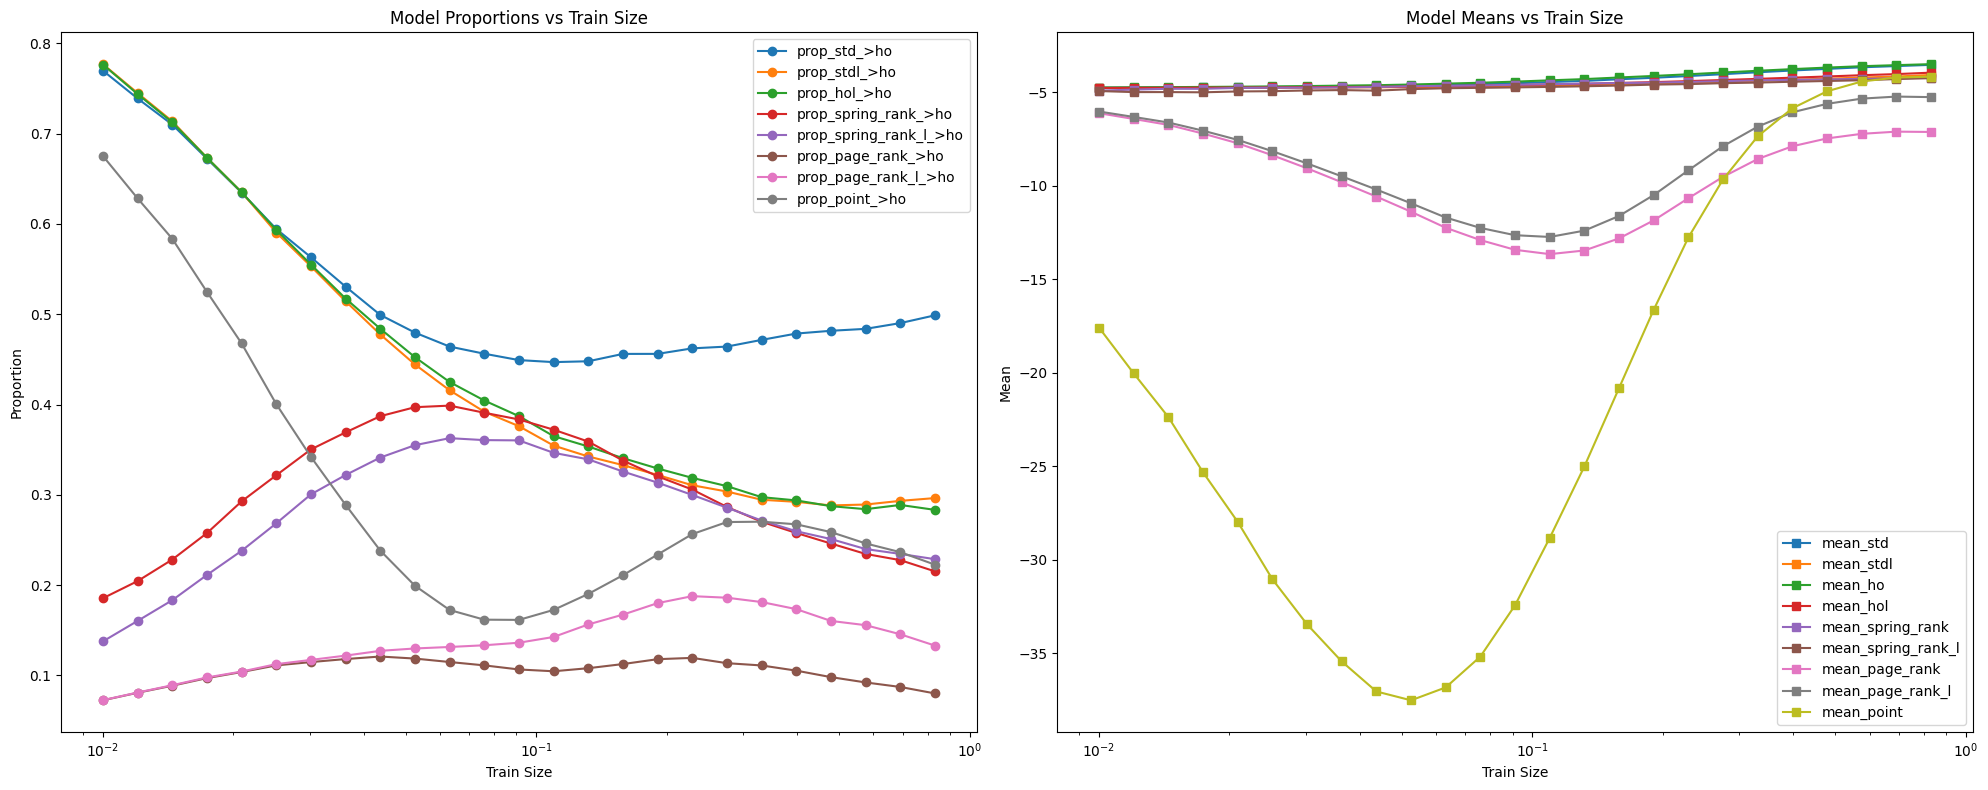

In [25]:
plot_proportions(proportions)

# Higher Order Leadership

In [26]:
N, M, K1, K2 = 1000, 2000, 5, 5
compared_axis = 4
proportions = evaluate_models(N, M, K1, K2, compared_axis, leadership=True)


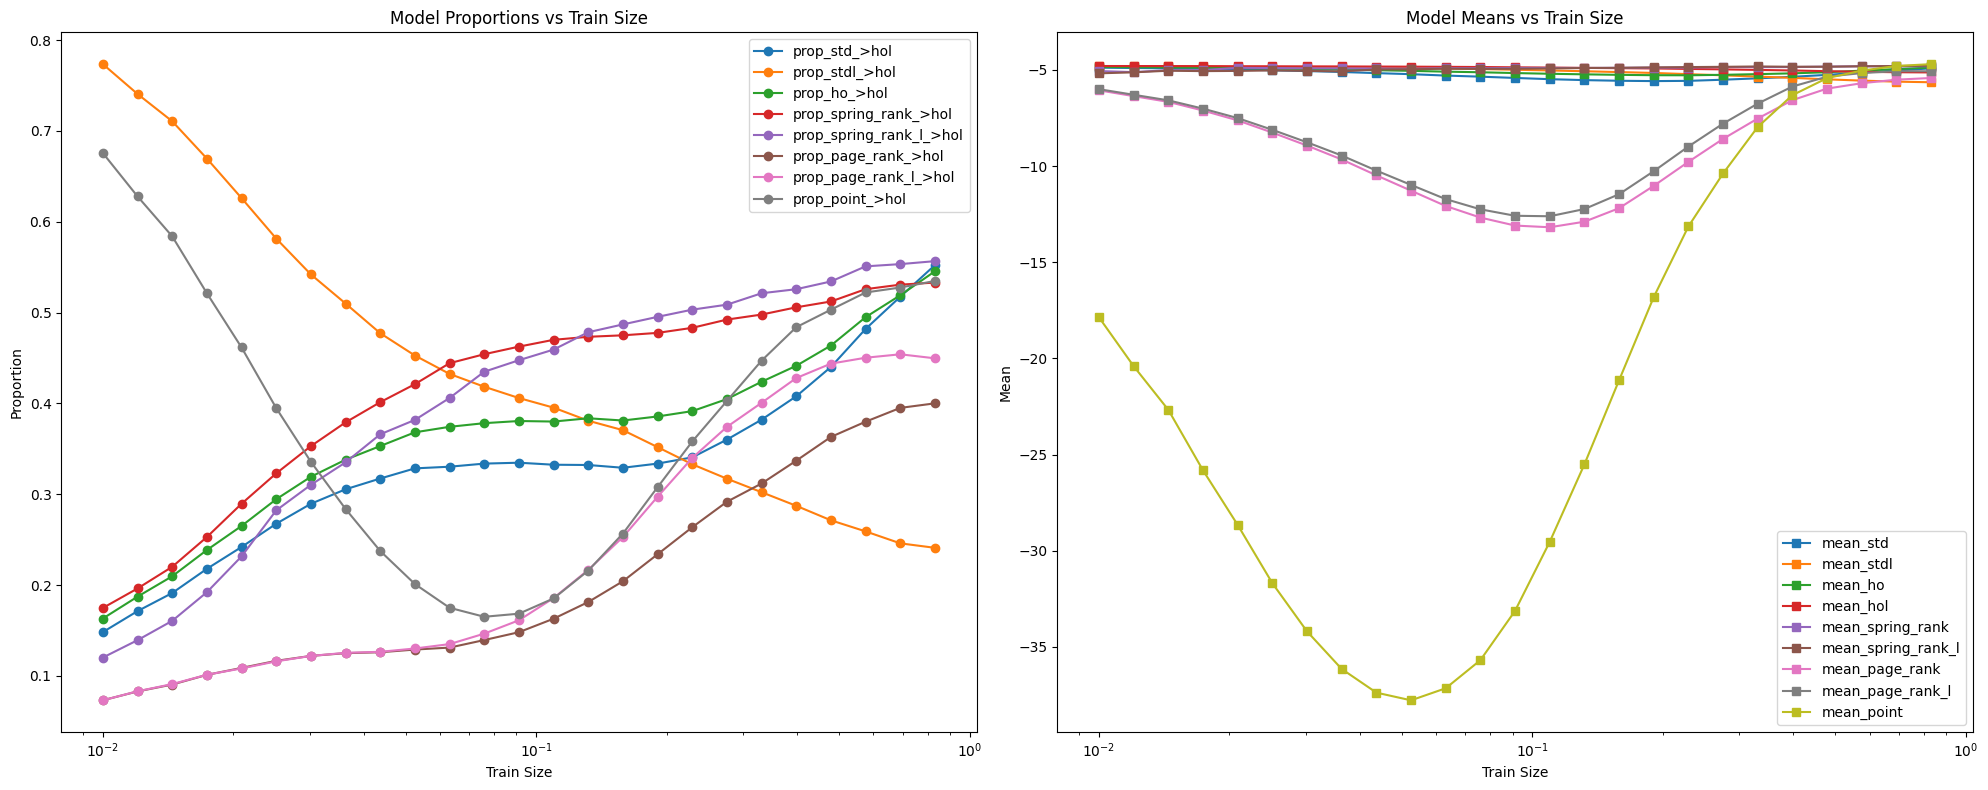

In [27]:
plot_proportions(proportions)